In [23]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,00008ff9,000fd460,00105258,00115b9f,0016bb22,001f3379,0038ba98,0068a485,0069fbed,0083e397,...,051680a0,051f73ae,052a1122,053d7d31,055156e2,056d498e,05777ce1,058990e9,058d2812,0598f669
Basic_Demos-Enroll_Season,Fall,Summer,Summer,Winter,Spring,Spring,Fall,Fall,Summer,Summer,...,Winter,Summer,Winter,Spring,Summer,Spring,Summer,Summer,Fall,Spring
Basic_Demos-Age,5,9,10,9,18,13,10,10,15,19,...,7,10,8,15,12,18,14,10,11,11
Basic_Demos-Sex,0,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
CGAS-Season,Winter,NaN,Fall,Fall,Summer,Winter,NaN,NaN,NaN,Summer,...,Spring,Winter,Spring,NaN,Winter,NaN,Winter,Winter,Winter,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDS-SDS_Total_Raw,NaN,46.0,38.0,31.0,NaN,40.0,27.0,NaN,NaN,NaN,...,50.0,42.0,35.0,NaN,51.0,NaN,61.0,57.0,64.0,29.0
SDS-SDS_Total_T,NaN,64.0,54.0,45.0,NaN,56.0,40.0,NaN,NaN,NaN,...,69.0,59.0,50.0,NaN,71.0,NaN,84.0,79.0,88.0,42.0
PreInt_EduHx-Season,Fall,Summer,Summer,Winter,NaN,Spring,Fall,Fall,Summer,NaN,...,Winter,Summer,Winter,Spring,Summer,Spring,Summer,Summer,Fall,Spring
PreInt_EduHx-computerinternet_hoursday,3.0,0.0,2.0,0.0,NaN,0.0,3.0,2.0,2.0,NaN,...,0.0,0.0,3.0,2.0,2.0,2.0,NaN,1.0,2.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
x_numeric = df[numeric_columns]

# Step 1: Impute missing values (e.g., with mean)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x_numeric)

# Step 2: Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)


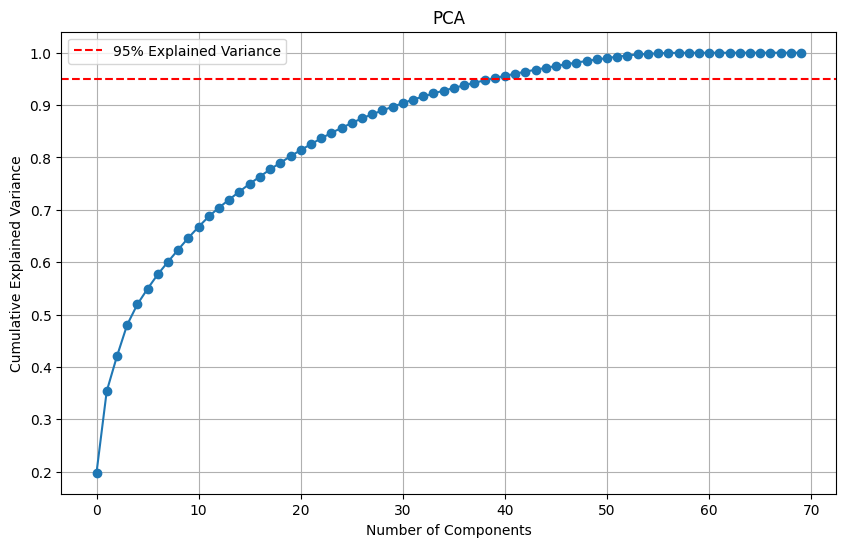

Number of components needed to explain 95% of variance: 40


In [4]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.grid(True)
plt.title('PCA')
plt.legend()
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to explain 95% of variance: {n_components}")


# Simulate high-dimensional data (like 40 PC components)
pca2  = PCA(n_components = n_components)
x_pca = pca.fit_transform(x_scaled)
X = x_pca




## Using KMeans

2025-12-10 13:34:55.614590: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-10 13:34:55.659443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-10 13:34:57.245632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarni

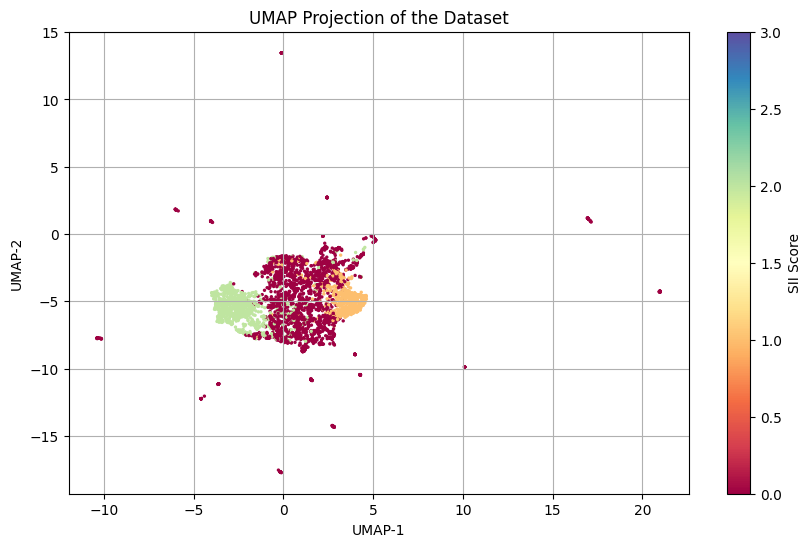

In [6]:
# import umap.umap_ as umap
import matplotlib.pyplot as plt
import umap

# Create and fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(x_pca)

#Plot the 2D UMAP projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
plt.colorbar(scatter, label="SII Score")
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


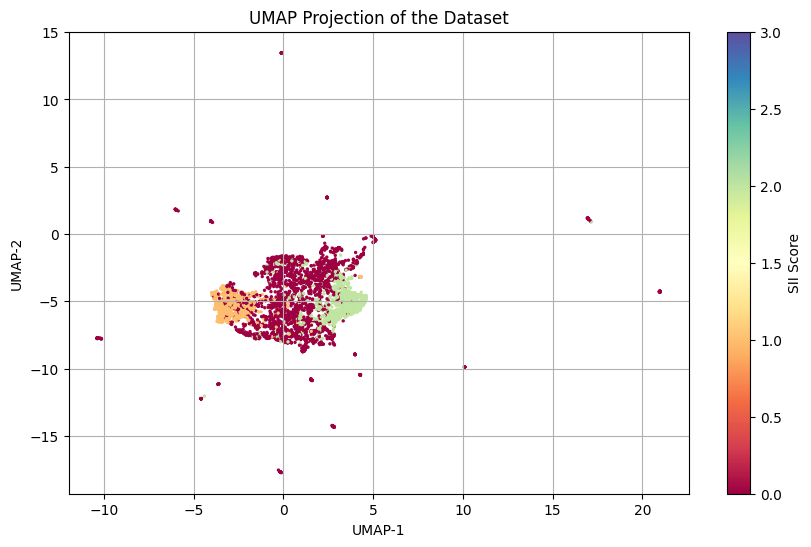

In [7]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=4)  
cluster_labels = birch.fit_predict(x_pca)

reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_scaled)


plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
plt.colorbar(scatter, label="SII Score")
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.257


/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


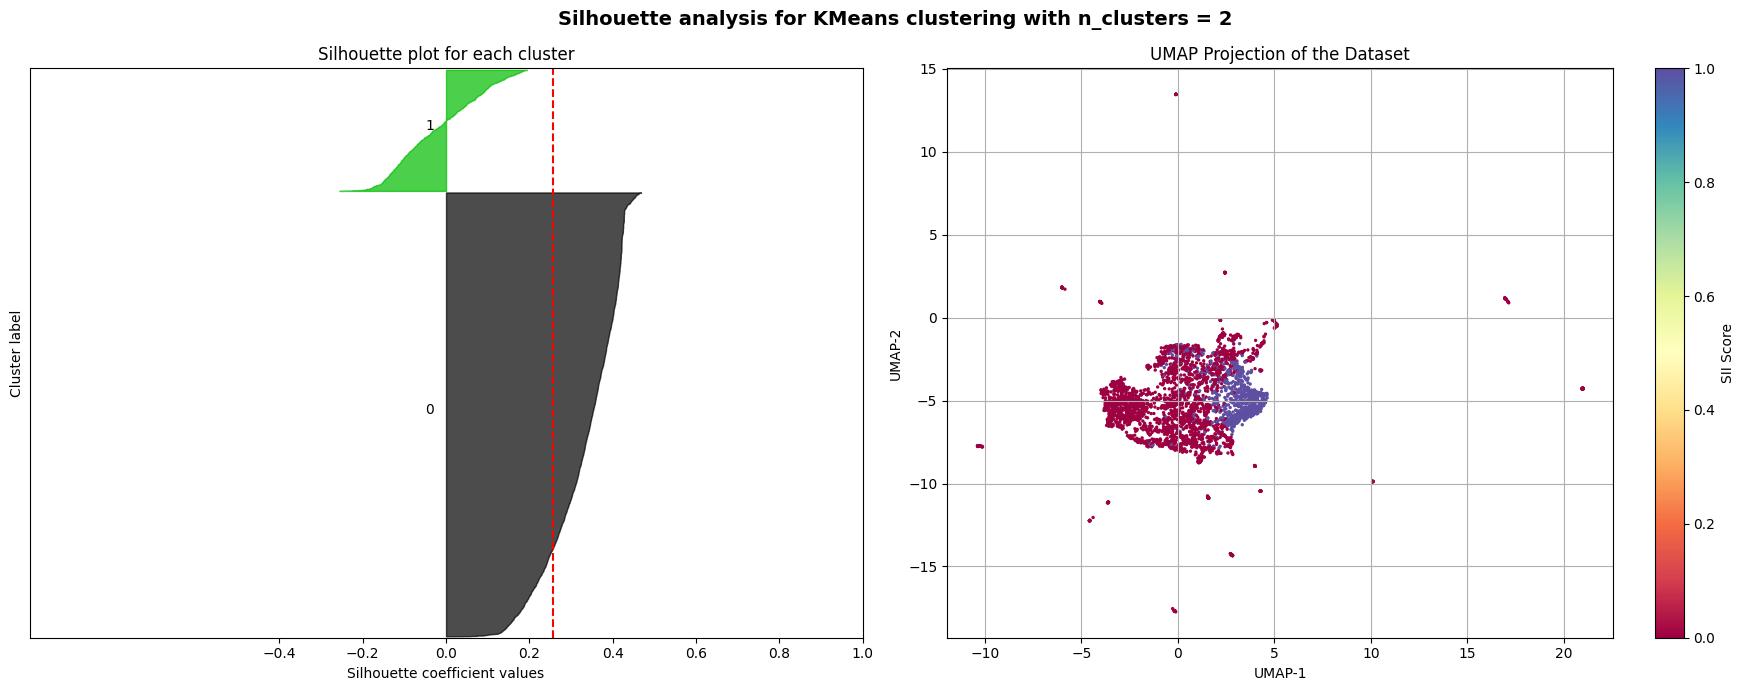

For n_clusters = 3, the average silhouette_score is : 0.249


/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


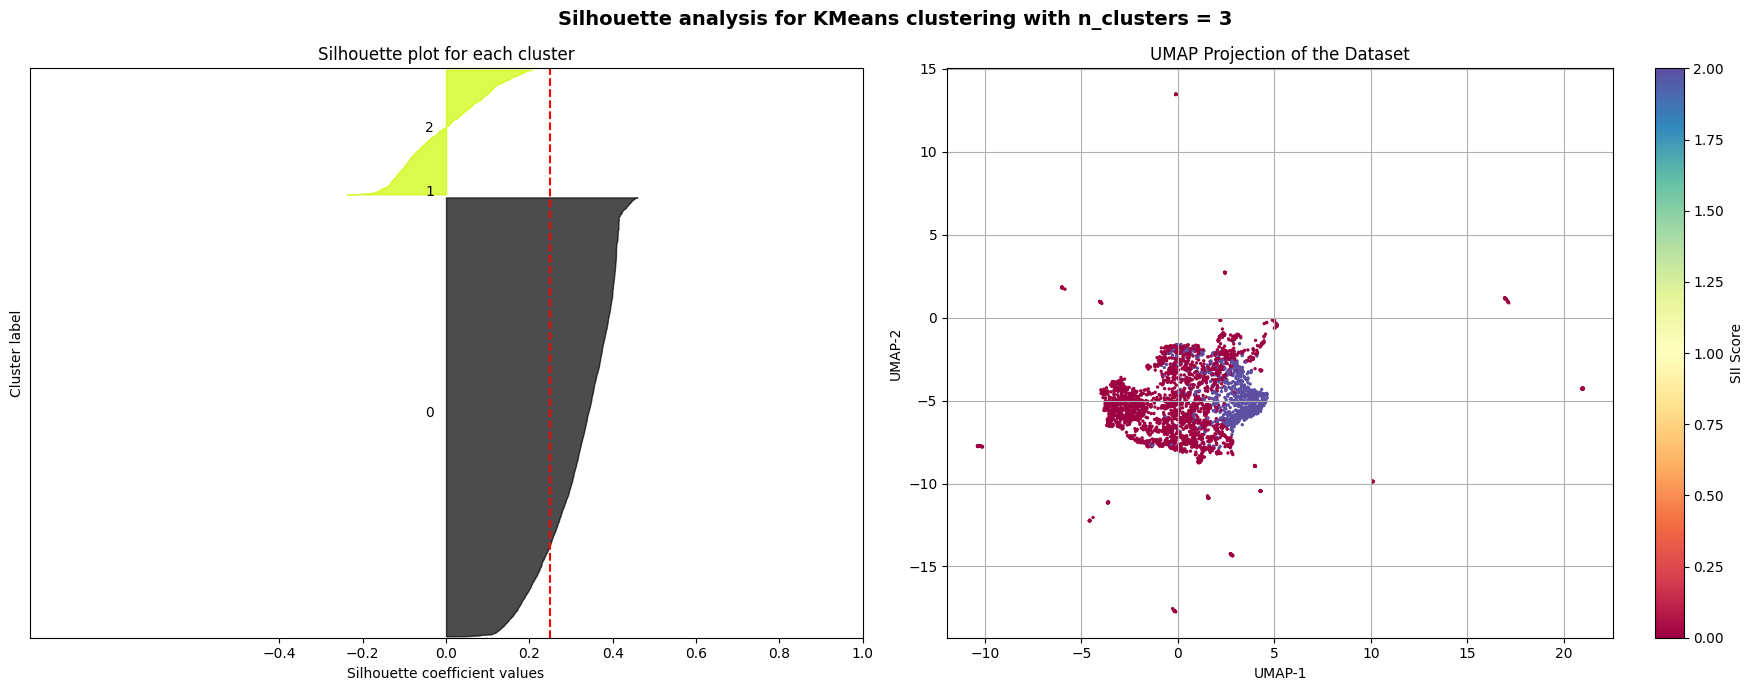

For n_clusters = 4, the average silhouette_score is : 0.131


/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


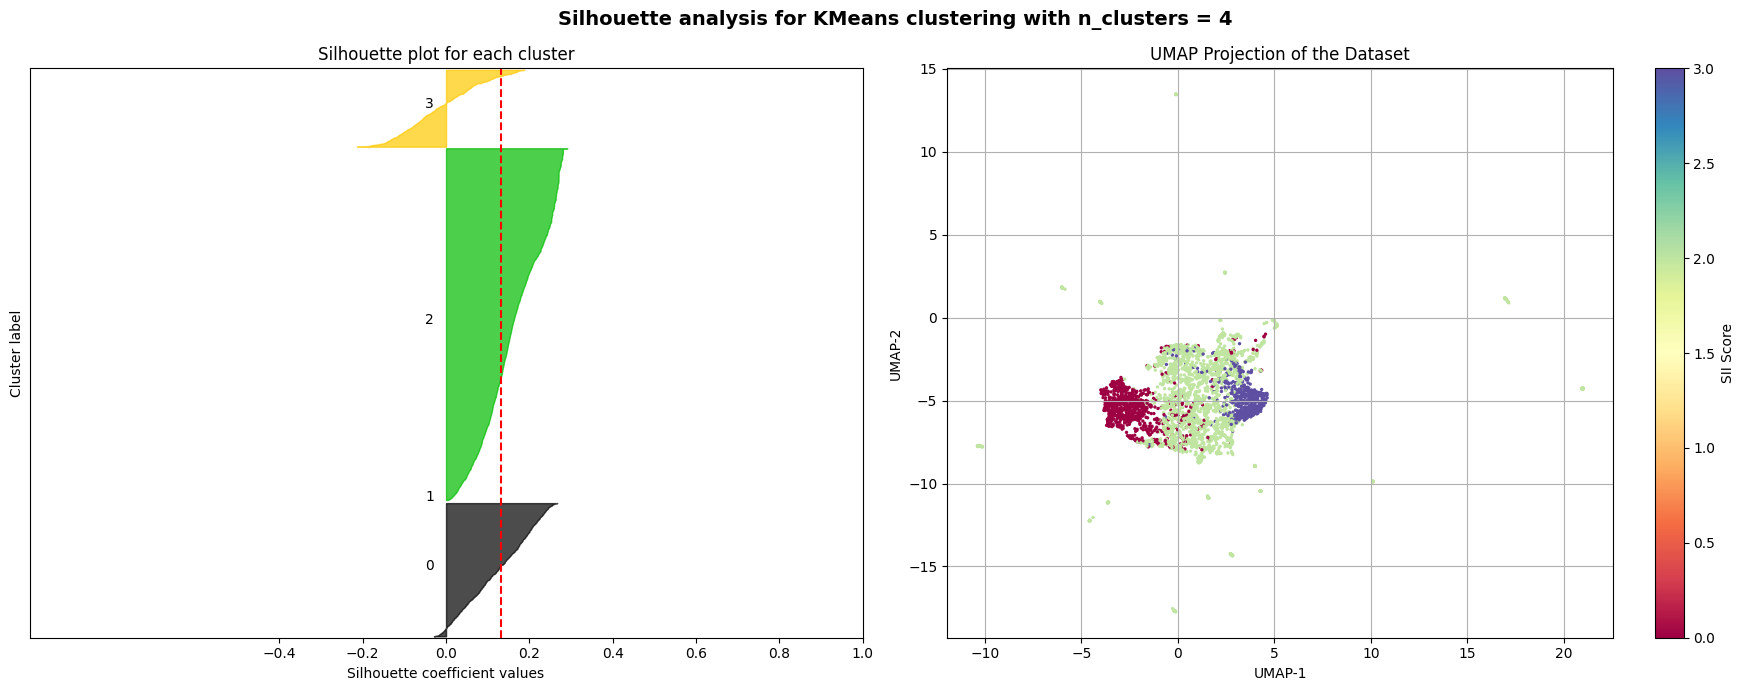

For n_clusters = 5, the average silhouette_score is : 0.130


/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


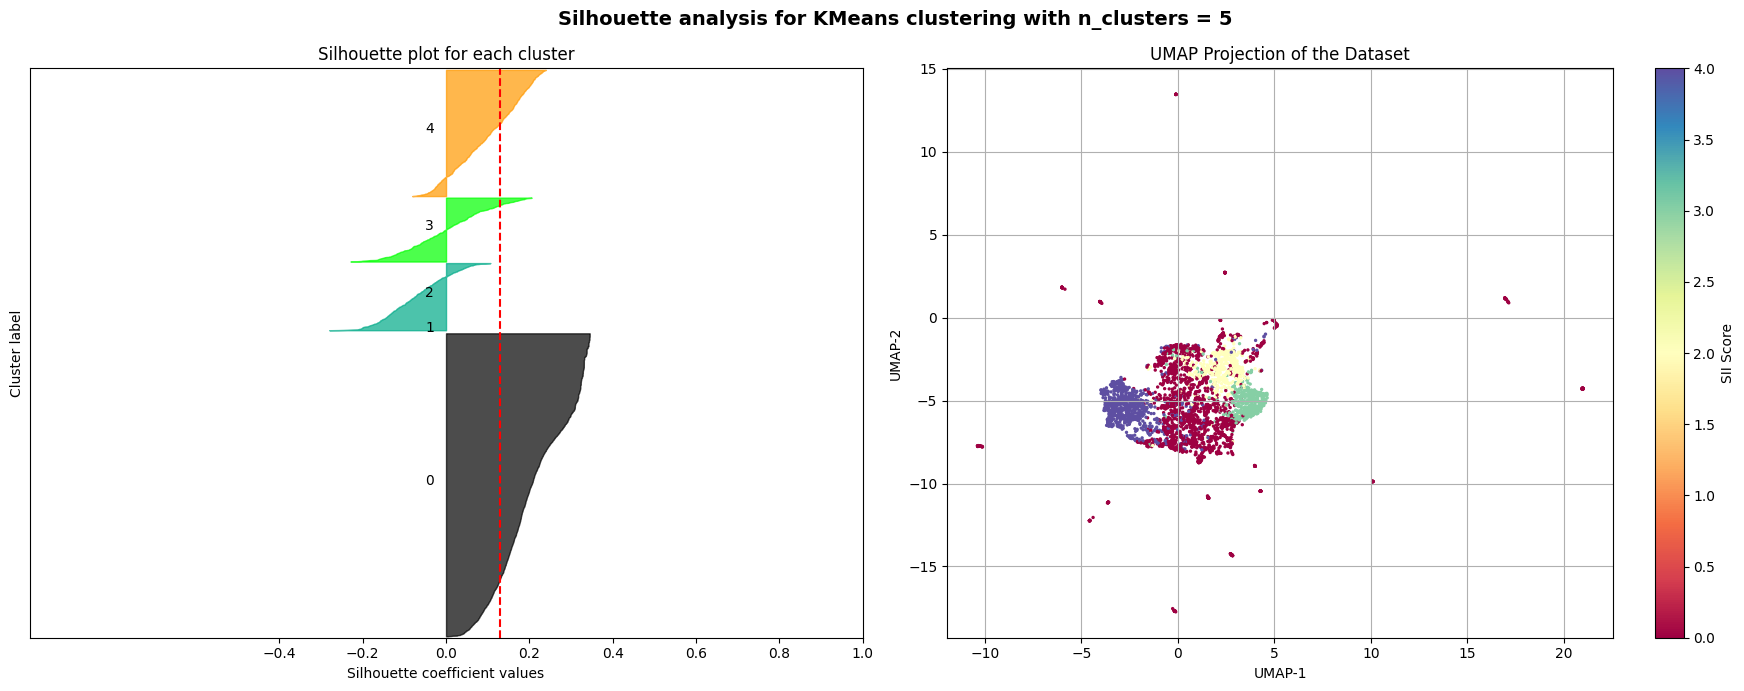

For n_clusters = 6, the average silhouette_score is : 0.121


/home/kushawaha-deepti/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


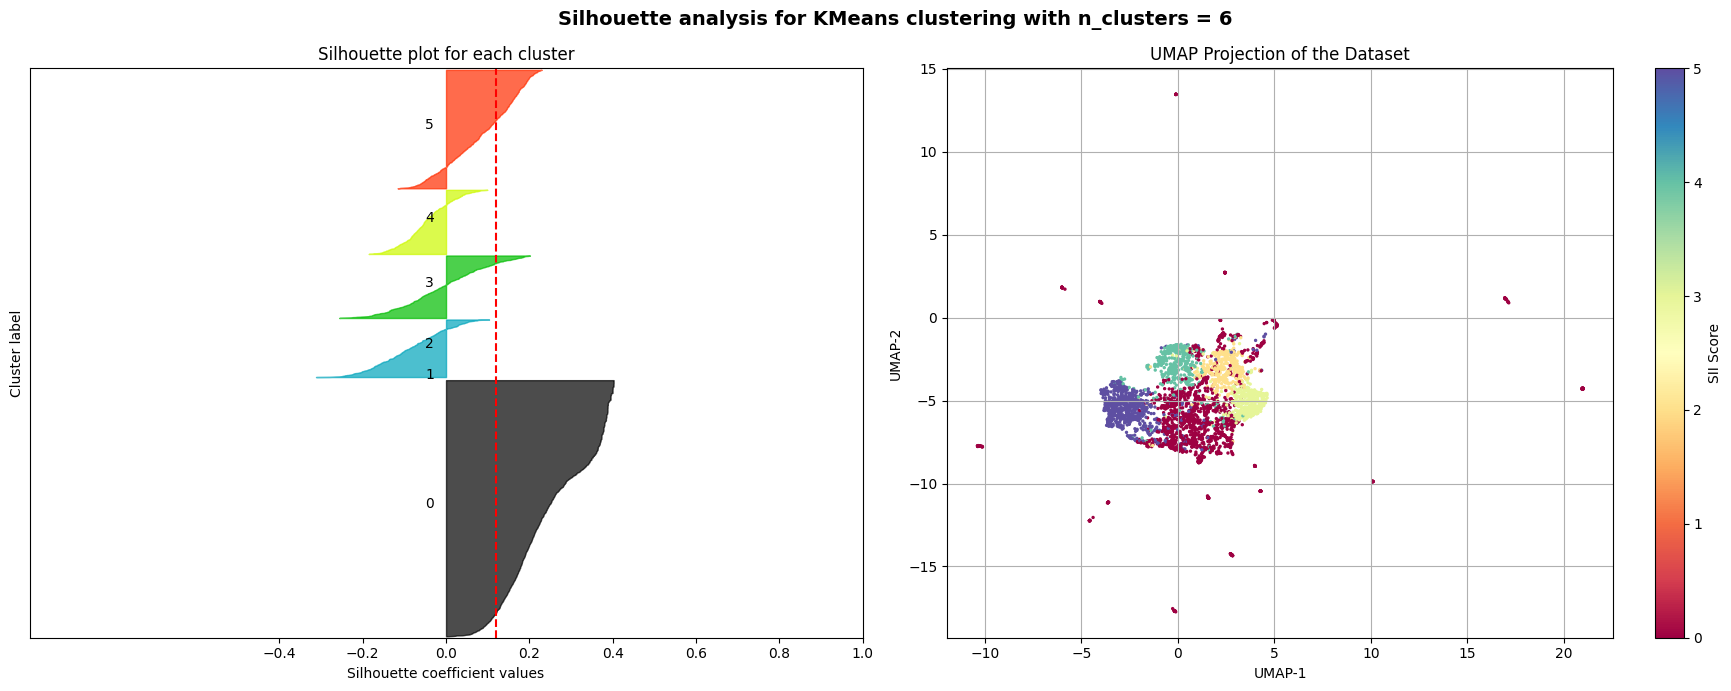

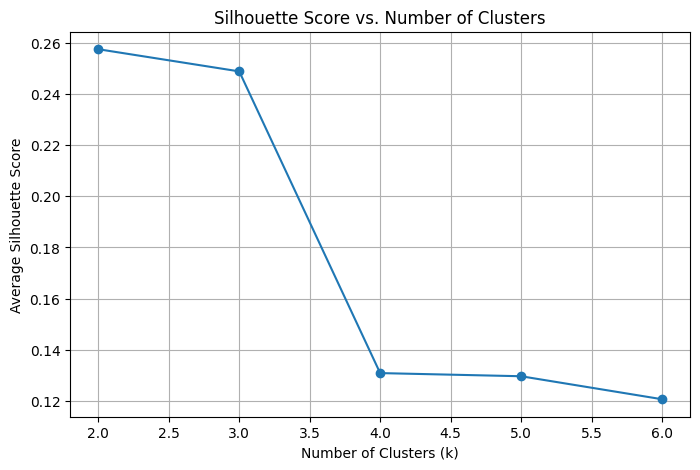

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for each cluster")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.linspace(-0.4, 1.0, 8))

    reducer = umap.UMAP(n_components=2, random_state=42)
    x_umap = reducer.fit_transform(x_scaled)


   
    scatter = ax2.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
    plt.colorbar(scatter,ax = ax2,label="SII Score")
    ax2.set_title("UMAP Projection of the Dataset")
    ax2.set_xlabel("UMAP-1")
    ax2.set_ylabel("UMAP-2")
    ax2.grid(True)

    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

In [24]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 387.4 kB/s eta 0:00:00m eta 0:00:010:00:08
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]━━ 1/2 [catboost]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:


# Select numeric columns
numeric_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
x_test_numeric = test_df[numeric_columns]


imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test_numeric)


scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_imputed)
x_test_pca  = pca.fit_transform(x_test_scaled)

In [ ]:
cluster_labels = kmeans.fit_predict(x_test_pca)